### NAMA: MUHAMMAD NAUFAL IHSAN MAULIDIN
### NIM: 2109106034
### KELAS: INFORMATIKA A2 2021

#### IMPORT LIBRARY YANG AKAN DIGUNAKAN

In [26]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

#### KITA JUGA DAPAT MENGIMPORT LIBRARY WARNING
#### UNTUK MENGHILANGKAN NOTIF WARNING

In [27]:
import warnings
warnings.filterwarnings('ignore')

#### IMPORT DATASET YANG DIGUNAKAN

#### MENGGUNAKAN DATASET BARU

In [28]:
df = pd.read_csv("EmployeeIndex.csv")
df.tail()

,Unnamed: 0,emp_id,age,Dept,location,education,recruitment_type,job_level,rating,onsite,awards,certifications,salary,satisfied
516,516,TECH2890,26,Technology,City,UG,On-Campus,2,1,0,1,0,28890,0
517,517,TECH1246,25,Technology,City,PG,On-Campus,1,2,0,3,1,31184,1
518,518,SAL9734,22,Sales,City,PG,Recruitment Agency,3,3,1,5,0,29014,1
519,519,HR2617,30,HR,City,UG,Recruitment Agency,3,4,1,5,1,33910,0
520,520,HR8821,30,HR,Suburb,PG,On-Campus,4,4,0,1,0,22654,1


#### CLEANING DAN TRANSFORMING DATA KARENA MENGGUNAKAN DATASET BARU

#### DATA CLEANING:

#### - MENGECEK NILAI NULL PADA DATASET -

In [29]:
df.isnull().sum()

Unnamed: 0          0
emp_id              0
age                 0
Dept                0
location            0
education           0
recruitment_type    0
job_level           0
rating              0
onsite              0
awards              0
certifications      0
salary              0
satisfied           0
dtype: int64

#### - MENGECEK NILAI DUPLIKAT PADA DATASET -

In [30]:
df[df.duplicated()]

,Unnamed: 0,emp_id,age,Dept,location,education,recruitment_type,job_level,rating,onsite,awards,certifications,salary,satisfied


In [31]:
print("Banyak Nilai Duplikat = ",df.duplicated().sum())

Banyak Nilai Duplikat =  0


#### KARENA TIDAK ADA DATA NULL DAN DUPLIKAT, TIDAK PERLU MELAKUKAN CLEANING KEMBALI

#### TRANSOFRMING DATA:

#### - NORMALISASI DATA -

In [32]:
from sklearn.preprocessing import MinMaxScaler

In [33]:
mms = MinMaxScaler()

In [34]:
x_norm = mms.fit_transform(df[["age"]])

In [35]:
datanormalisasi = pd.DataFrame(x_norm)
datanormalisasi.head(10)

,0
0,0.18750
1,0.87500
2,0.65625
3,0.68750
4,0.34375
5,0.56250
6,0.12500
7,0.09375
8,0.40625
9,0.71875


#### - STANDARISASI DATA -

In [36]:
# Import Library yang akan digunakan
from sklearn.preprocessing import StandardScaler

In [37]:
standard = StandardScaler()

In [38]:
x_standard = standard.fit_transform(df[["age", "job_level", "rating", "awards", "salary"]])

In [39]:
print("Nilai sesudah di standarisasi : ", np.nanstd(x_standard))

Nilai sesudah di standarisasi :  1.0


#### MEMBUAT SUBSET

In [40]:
subset = df[['age', 'salary']]

In [41]:
x_scaled = standard.fit_transform(subset)

#### MENGGUNAKAN ALGORITMA CLUSTERING

#### KMEANS

#### IMPORT LIBRARY YANG DIGUNAKAN PADA KMEANS

In [42]:
from sklearn.cluster import KMeans

In [43]:
km = KMeans(n_clusters = 3, random_state = 0)
km.fit(x_scaled)

KMeans(n_clusters=3, random_state=0)

In [44]:
labels = km.labels_
print(labels)

[0 2 0 2 1 2 0 1 1 2 0 2 1 2 0 0 1 1 2 0 1 0 0 0 0 0 0 1 0 2 2 2 2 0 2 0 2
 1 2 1 1 2 2 1 1 0 1 2 0 1 0 2 2 2 0 2 0 2 0 0 0 2 0 0 1 0 2 1 2 1 1 1 2 2
 0 0 1 1 0 0 2 1 2 1 0 2 0 2 1 0 0 1 0 2 1 0 0 2 2 0 0 0 0 2 2 0 0 0 1 0 0
 2 1 1 0 1 1 0 1 1 0 0 1 0 2 1 2 0 2 0 0 1 2 2 2 1 1 0 1 2 1 1 0 0 0 2 2 0
 1 0 1 0 0 2 2 2 2 1 2 1 2 1 1 1 1 2 1 2 2 2 0 0 1 2 1 1 1 2 2 2 1 0 2 0 0
 2 2 0 2 0 1 2 1 2 0 2 1 0 2 2 2 0 2 0 1 0 2 0 0 1 2 2 2 1 1 2 1 2 2 2 1 1
 0 1 1 0 0 0 2 2 0 0 2 0 1 0 2 2 1 1 1 0 0 2 0 0 2 0 2 2 0 0 0 2 2 0 0 0 0
 2 0 0 1 1 1 1 1 2 0 0 1 2 1 0 2 0 1 2 0 2 0 1 1 2 1 0 2 1 0 0 0 2 2 2 2 2
 2 0 1 2 1 1 0 0 2 2 0 1 1 2 1 2 0 2 2 2 0 2 2 1 2 2 0 1 0 1 1 1 1 2 0 0 2
 1 1 1 0 1 2 2 0 2 1 1 1 1 0 1 2 0 1 0 1 0 1 2 2 1 1 1 0 1 0 2 0 0 0 1 0 2
 2 0 0 2 1 1 0 2 1 1 2 0 1 2 1 0 0 0 2 2 2 0 1 1 1 1 0 0 2 0 0 0 2 2 0 0 1
 1 0 0 0 2 0 0 2 2 0 2 2 0 2 2 2 2 2 2 1 0 1 1 2 2 2 0 0 0 2 0 1 2 2 0 1 2
 2 0 1 0 2 2 1 2 1 2 0 1 1 2 2 1 0 1 0 1 0 0 2 2 2 2 0 0 2 0 2 1 2 0 0 0 1
 0 0 1 1 0 0 0 2 1 0 1 1 

#### EVALUASI KMEANS MENGGUNAKAN CROSS TAB

In [45]:
kmeans = pd.DataFrame({'labels':labels, 'Dept':df.Dept})

In [46]:
crosstab = pd.crosstab(kmeans['labels'], kmeans['Dept'])
crosstab

Dept,HR,Marketing,Purchasing,Sales,Technology
labels,,,,,
0,36,34,47,39,23
1,46,32,27,27,35
2,30,34,36,29,46


#### MENAMPILKAN CENTROID TIAP CLUSTER

In [47]:
scalex = x_scaled[:, 0]
scaley = x_scaled[:, 1]

In [48]:
centroids = km.cluster_centers_
x_centroids = centroids[:, 0]
y_centroids = centroids[:, 1]

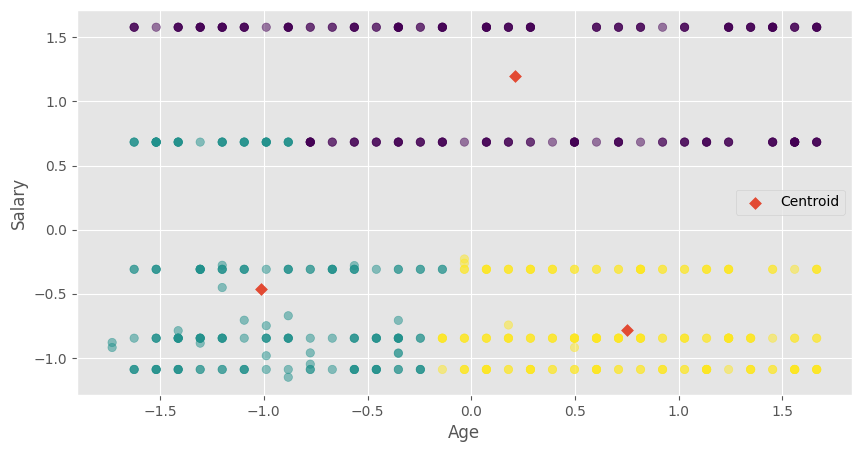

In [49]:
plt.figure(figsize = (10,5))
plt.style.use('ggplot') # untuk menampilkan grid background #
plt.scatter(scalex, scaley, c = labels, alpha = 0.5)
plt.scatter(x_centroids, y_centroids, marker = 'D', label = "Centroid")
plt.xlabel("Age")
plt.ylabel("Salary")
plt.legend()
plt.show()

#### MENENTUKAN CLUSTER DENGAN METODE ELBOW

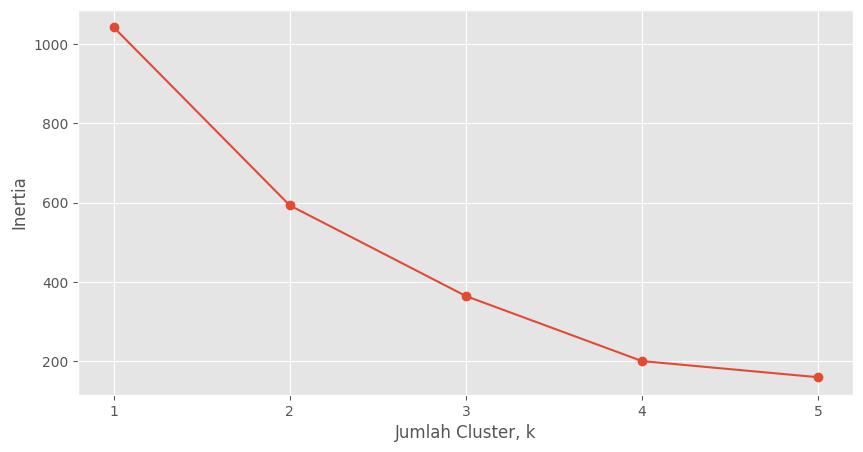

In [50]:
ks = range(1, 6)
inertias = []
for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(x_scaled)
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
plt.figure(figsize=(10,5))
plt.plot(ks, inertias, '-o')
plt.xlabel('Jumlah Cluster, k')
plt.ylabel('Inertia')
plt.xticks(ks)
plt.show()

## SELESAI

## TERIMA KASIH